# Data Preprocessing Steps

1. Reading Data
2. Exploring Data / Data Insight
3. Cleansing Data
4. Outlier Detection and Removing
5. Data Transformation (Normalize Data / Rescale Data)
6. Categorical into Numerical 
7. Dimensionality Reduction(PCA)
8. Handling Imbalanced Data
9. Feature Selection
10. Data Splitting

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt #for data visualizing
import seaborn as sns 
color = sns.color_palette()

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# 1: Reading Data

In [2]:
data = pd.read_csv('echocardiogram.csv')
data.head()

,survival,alive,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotion-score,wallmotion-index,mult,name,group,aliveat1
0,11.0,0.0,71.0,0.0,0.260,9.000,4.600,14.0,1.00,1.000,name,1,0.0
1,19.0,0.0,72.0,0.0,0.380,6.000,4.100,14.0,1.70,0.588,name,1,0.0
2,16.0,0.0,55.0,0.0,0.260,4.000,3.420,14.0,1.00,1.000,name,1,0.0
3,57.0,0.0,60.0,0.0,0.253,12.062,4.603,16.0,1.45,0.788,name,1,0.0
4,19.0,1.0,57.0,0.0,0.160,22.000,5.750,18.0,2.25,0.571,name,1,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   survival              130 non-null    float64
 1   alive                 131 non-null    float64
 2   age                   126 non-null    float64
 3   pericardialeffusion   132 non-null    float64
 4   fractionalshortening  124 non-null    float64
 5   epss                  117 non-null    float64
 6   lvdd                  121 non-null    float64
 7   wallmotion-score      128 non-null    float64
 8   wallmotion-index      130 non-null    float64
 9   mult                  129 non-null    float64
 10  name                  131 non-null    object 
 11  group                 110 non-null    object 
 12  aliveat1              75 non-null     float64
dtypes: float64(11), object(2)
memory usage: 13.6+ KB


# 2: Data Cleaning

Handling Missing Values
-
- Imputation: Filling missing values with mean.

In [11]:
data.isnull().sum()

survival                 0
alive                    0
age                      0
pericardialeffusion      0
fractionalshortening     0
epss                     0
lvdd                     0
wallmotion-score         0
wallmotion-index         0
mult                     0
aliveat1                 0
name                     2
group                   23
dtype: int64

In [13]:
import pandas as pd
import numpy as np

# Separate numeric and non-numeric columns
numeric_cols = data.select_dtypes(include=[np.number])
non_numeric_cols = data.select_dtypes(exclude=[np.number])

# Fill missing values in numeric columns with the mean
numeric_cols.fillna(numeric_cols.mean(), inplace=True)   # Numerical features
#non_numeric_cols.fillna(non_numeric_cols.mode(), inplace=True) # Categorical features


# Combine back with non-numeric columns
data = pd.concat([numeric_cols, non_numeric_cols], axis=1)

# Check for any remaining missing values
missing_values = data.isnull().sum()
print(missing_values)


survival                 0
alive                    0
age                      0
pericardialeffusion      0
fractionalshortening     0
epss                     0
lvdd                     0
wallmotion-score         0
wallmotion-index         0
mult                     0
aliveat1                 0
name                     2
group                   23
dtype: int64


In [14]:
data.shape

(133, 13)

Removal: Deleting rows with missing values.
-

In [14]:
data = pd.read_csv('echocardiogram.csv')
data.isnull().sum()

survival                 3
alive                    2
age                      7
pericardialeffusion      1
fractionalshortening     9
epss                    16
lvdd                    12
wallmotion-score         5
wallmotion-index         3
mult                     4
name                     2
group                   23
aliveat1                58
dtype: int64

In [15]:
data.shape

(133, 13)

In [17]:
# Drop rows with any missing values
data.dropna(inplace=True)

# Check for any remaining missing values
missing_values = data.isnull().sum()
print(missing_values)


survival                0
alive                   0
age                     0
pericardialeffusion     0
fractionalshortening    0
epss                    0
lvdd                    0
wallmotion-score        0
wallmotion-index        0
mult                    0
name                    0
group                   0
aliveat1                0
dtype: int64


In [18]:
data.shape

(61, 13)

Removing Duplicates
-

In [20]:
data = pd.read_csv('echocardiogram.csv')
data.shape


(133, 13)

In [21]:
data.drop_duplicates(inplace=True)
data.shape

(133, 13)

# 3: Outlier Detection and Removal

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('echocardiogram.csv')

# Checking the structure of the dataset
#print(data.info())
data.describe()

,survival,alive,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotion-score,wallmotion-index,mult,aliveat1
count,130.000000,131.000000,126.000000,132.000000,124.000000,117.000000,121.000000,128.000000,130.00000,129.000000,75.000000
mean,22.182923,0.328244,62.813722,0.765152,0.216734,12.164769,4.763157,14.438125,1.37800,0.786202,0.346667
std,15.858267,0.471377,8.342110,6.697225,0.107513,7.370159,0.810013,5.018566,0.45185,0.225661,0.506534
min,0.030000,0.000000,35.000000,0.000000,0.010000,0.000000,2.320000,2.000000,1.00000,0.140000,0.000000
25%,7.875000,0.000000,57.000000,0.000000,0.150000,7.000000,4.230000,11.000000,1.00000,0.714000,0.000000
50%,23.500000,0.000000,62.000000,0.000000,0.205000,11.000000,4.650000,14.000000,1.21600,0.786000,0.000000
75%,33.000000,1.000000,67.750000,0.000000,0.270000,16.100000,5.300000,16.500000,1.50750,0.857000,1.000000
max,57.000000,1.000000,86.000000,77.000000,0.610000,40.000000,6.780000,39.000000,3.00000,2.000000,2.000000


In [18]:
0.25-1.5*0.5

-0.5

In [19]:
0.75 + 1.5 * 0.5

1.5

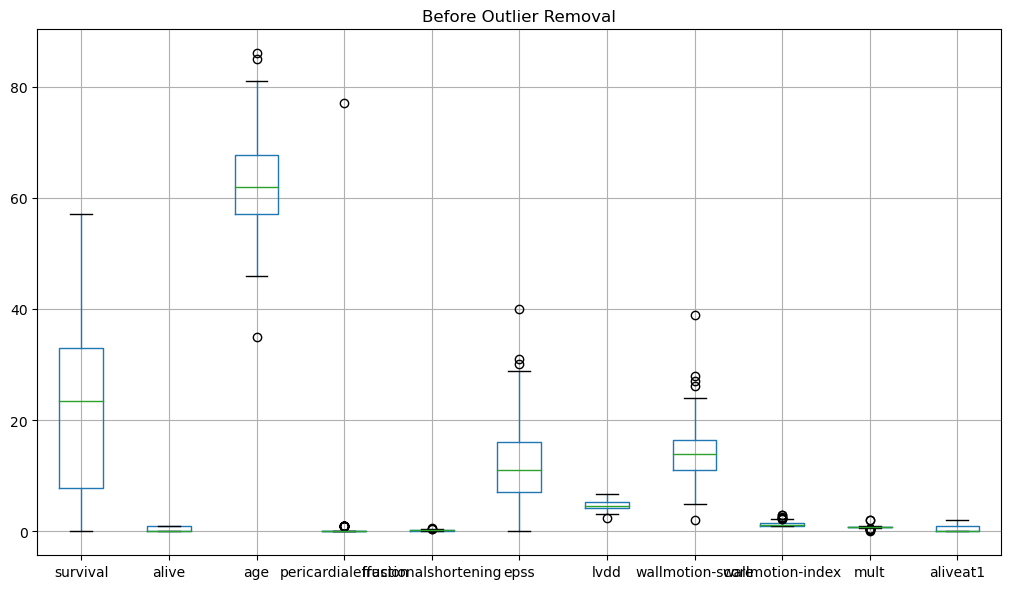

In [34]:
# Identify numeric columns
numeric_cols = data.select_dtypes(include=[np.number])

# Calculate IQR
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers        # 0.25-1.5*0.5 = -0.5                      #  0.75 + 1.5 * 0.5 = 1.5

data_cleaned = data[((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))).any(axis=1)]

# Visualizing the data before and after outlier removal
plt.figure(figsize=(20, 6))

# Box plot before removing outliers
plt.subplot(1, 2, 1)
numeric_cols.boxplot()
plt.title("Before Outlier Removal")

# # Box plot after removing outliers
# plt.subplot(1, 2, 2)
# data_cleaned.select_dtypes(include=[np.number]).boxplot()
# plt.title("After Outlier Removal")

plt.tight_layout()
plt.show()


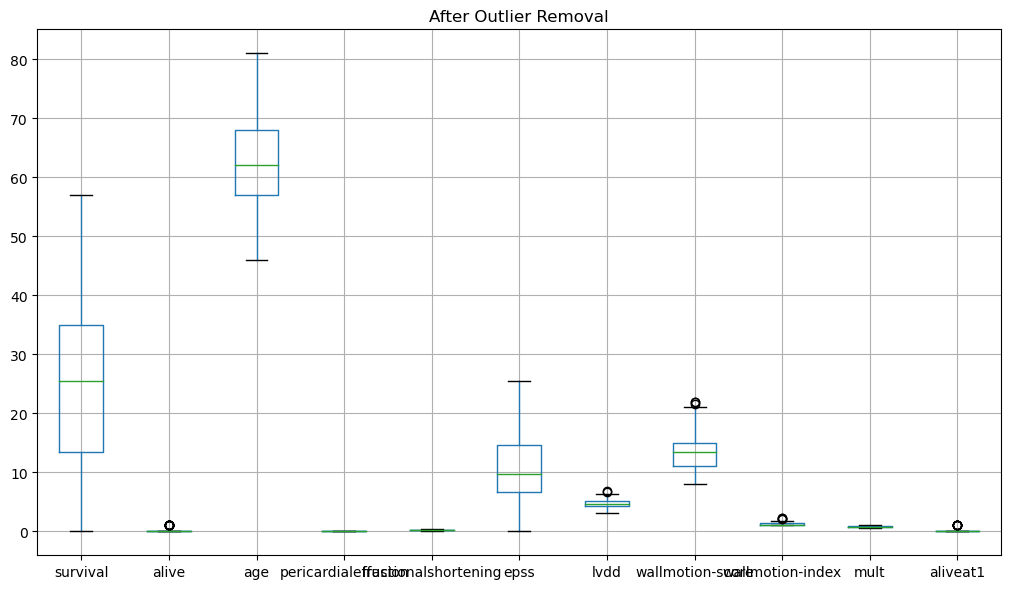

In [35]:
plt.figure(figsize=(20, 6))

# Box plot after removing outliers
plt.subplot(1, 2, 2)
data_cleaned.select_dtypes(include=[np.number]).boxplot()
plt.title("After Outlier Removal")

plt.tight_layout()
plt.show()


In [36]:
data_cleaned.shape

(88, 13)

In [37]:
data_cleaned.head()

,survival,alive,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotion-score,wallmotion-index,mult,name,group,aliveat1
0,11.0,0.0,71.0,0.0,0.260,9.000,4.600,14.0,1.00,1.000,name,1,0.0
1,19.0,0.0,72.0,0.0,0.380,6.000,4.100,14.0,1.70,0.588,name,1,0.0
2,16.0,0.0,55.0,0.0,0.260,4.000,3.420,14.0,1.00,1.000,name,1,0.0
3,57.0,0.0,60.0,0.0,0.253,12.062,4.603,16.0,1.45,0.788,name,1,0.0
4,19.0,1.0,57.0,0.0,0.160,22.000,5.750,18.0,2.25,0.571,name,1,0.0


# 4. Data Transformation


Key Differences
-
Range of Values:

Normalization: Values are scaled to a fixed range, typically [0, 1].
Standardization: Values are rescaled to have a mean of 0 and a standard deviation of 1.
Effect on Distribution:

Normalization: Compresses or stretches the data to fit within the specified range, potentially altering the original distribution.
Standardization: Preserves the shape of the original distribution but changes the scale.
Use Cases:

Normalization: Suitable for distance-based algorithms, like k-nearest neighbors and neural networks.
Standardization: Suitable for algorithms that assume a normal distribution, like linear regression and logistic regression.


Normalization/Standardization
-
- Normalization
Definition:
Normalization rescales the data to a fixed range, typically [0, 1] or [-1, 1].

In [41]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
data = pd.read_csv('echocardiogram.csv')

# Separate numeric and non-numeric columns
numeric_cols = data.select_dtypes(include=[np.number])
non_numeric_cols = data.select_dtypes(exclude=[np.number])

# Apply MinMaxScaler to the numeric columns
scaler = MinMaxScaler()
scaled_numeric_data = scaler.fit_transform(numeric_cols)

# Convert the scaled numeric data back to a DataFrame
scaled_numeric_df = pd.DataFrame(scaled_numeric_data, columns=numeric_cols.columns)

# Combine the scaled numeric columns with the non-numeric columns
scaled_data = pd.concat([scaled_numeric_df, non_numeric_cols.reset_index(drop=True)], axis=1)

# Check the shape of the scaled data
print(scaled_data.shape)
print()
print('*' * 60)
scaled_data.head()


(133, 13)

************************************************************


,survival,alive,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotion-score,wallmotion-index,mult,aliveat1,name,group
0,0.192557,0.0,0.705882,0.0,0.416667,0.22500,0.511211,0.324324,0.000,0.462366,0.0,name,1
1,0.332982,0.0,0.725490,0.0,0.616667,0.15000,0.399103,0.324324,0.350,0.240860,0.0,name,1
2,0.280323,0.0,0.392157,0.0,0.416667,0.10000,0.246637,0.324324,0.000,0.462366,0.0,name,1
3,1.000000,0.0,0.490196,0.0,0.405000,0.30155,0.511883,0.378378,0.225,0.348387,0.0,name,1
4,0.332982,1.0,0.431373,0.0,0.250000,0.55000,0.769058,0.432432,0.625,0.231720,0.0,name,1


Standardization
-
Definition:
Standardization rescales the data so that it has a mean of 0 and a standard deviation of 1.

In [43]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('echocardiogram.csv')

# Separate numeric and non-numeric columns
numeric_cols = data.select_dtypes(include=[np.number])
non_numeric_cols = data.select_dtypes(exclude=[np.number])

# Apply StandardScaler to the numeric columns
scaler = StandardScaler()
scaled_numeric_data = scaler.fit_transform(numeric_cols)

# Convert the scaled numeric data back to a DataFrame
scaled_numeric_df = pd.DataFrame(scaled_numeric_data, columns=numeric_cols.columns)

# Combine the scaled numeric columns with the non-numeric columns
scaled_data = pd.concat([scaled_numeric_df, non_numeric_cols.reset_index(drop=True)], axis=1)

# Check the shape of the scaled data
print(scaled_data.shape)
print()
print('*' * 60)
scaled_data.head()


(133, 13)

************************************************************


,survival,alive,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotion-score,wallmotion-index,mult,aliveat1,name,group
0,-0.707907,-0.699025,0.985237,-0.114684,0.404060,-0.431250,-0.202263,-0.087644,-0.839797,0.951128,-0.688999,name,1
1,-0.201487,-0.699025,1.105590,-0.114684,1.524734,-0.840048,-0.822103,-0.087644,0.715383,-0.881742,-0.688999,name,1
2,-0.391395,-0.699025,-0.940399,-0.114684,0.404060,-1.112579,-1.665087,-0.087644,-0.839797,0.951128,-0.688999,name,1
3,2.204009,-0.699025,-0.338638,-0.114684,0.338688,-0.014004,-0.198544,0.312442,0.159961,0.008001,-0.688999,name,1
4,-0.201487,1.430563,-0.699695,-0.114684,-0.529835,1.340206,1.223371,0.712528,1.937310,-0.957370,-0.688999,name,1


# 5: One-Hot Encoding


In [54]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('echocardiogram.csv')

# Separate numeric and non-numeric columns
cat_features = [feature for feature in data.columns if data[feature].dtype == 'O']

# Convert categorical columns using pd.get_dummies
data1 = pd.get_dummies(data, columns=cat_features)

# Combine the scaled numeric columns with the non-numeric columns (if any)
scaled_data = pd.concat([data, data1], axis=1)

# Check the shape of the scaled data
print(scaled_data.shape)
print()
print('*' * 70)

scaled_data.head()


(133, 28)

**********************************************************************


,survival,alive,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotion-score,wallmotion-index,mult,...,epss,lvdd,wallmotion-score,wallmotion-index,mult,aliveat1,name_name,group_1,group_2,group_name
0,11.0,0.0,71.0,0.0,0.260,9.000,4.600,14.0,1.00,1.000,...,9.000,4.600,14.0,1.00,1.000,0.0,True,True,False,False
1,19.0,0.0,72.0,0.0,0.380,6.000,4.100,14.0,1.70,0.588,...,6.000,4.100,14.0,1.70,0.588,0.0,True,True,False,False
2,16.0,0.0,55.0,0.0,0.260,4.000,3.420,14.0,1.00,1.000,...,4.000,3.420,14.0,1.00,1.000,0.0,True,True,False,False
3,57.0,0.0,60.0,0.0,0.253,12.062,4.603,16.0,1.45,0.788,...,12.062,4.603,16.0,1.45,0.788,0.0,True,True,False,False
4,19.0,1.0,57.0,0.0,0.160,22.000,5.750,18.0,2.25,0.571,...,22.000,5.750,18.0,2.25,0.571,0.0,True,True,False,False


In [55]:
data1.head()

,survival,alive,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotion-score,wallmotion-index,mult,aliveat1,name_name,group_1,group_2,group_name
0,11.0,0.0,71.0,0.0,0.260,9.000,4.600,14.0,1.00,1.000,0.0,True,True,False,False
1,19.0,0.0,72.0,0.0,0.380,6.000,4.100,14.0,1.70,0.588,0.0,True,True,False,False
2,16.0,0.0,55.0,0.0,0.260,4.000,3.420,14.0,1.00,1.000,0.0,True,True,False,False
3,57.0,0.0,60.0,0.0,0.253,12.062,4.603,16.0,1.45,0.788,0.0,True,True,False,False
4,19.0,1.0,57.0,0.0,0.160,22.000,5.750,18.0,2.25,0.571,0.0,True,True,False,False


# 6: Data Reduction

Dimensionality Reduction
-
PCA (Principal Component Analysis)

In [57]:
scaled_data.shape

(133, 28)

(133, 15)
[[-9.12639249e-01  4.53452214e-01 -4.99537314e-01 -4.58114570e-01
   9.71722605e-01 -8.27163767e-01  8.81996037e-01 -2.31820822e-01
  -3.00356981e-01 -1.39510711e+00  4.29882224e-02  1.03670257e-01
   2.35381648e-01 -3.31039477e-03  2.02449715e-03]
 [-1.03662582e+00 -5.62586520e-01 -1.27827101e+00  1.17450274e+00
   1.53572069e+00  6.39273052e-01 -2.57830556e-01 -8.27548735e-02
  -3.12122184e-01 -1.28312678e+00  2.64361832e-01  1.63730156e-01
   2.22679910e-01 -3.07114396e-03  2.73632479e-03]
 [-2.02287758e+00  1.00940228e+00 -3.67733924e-01  1.01399397e+00
  -7.12558853e-01 -9.18890580e-01  5.64684568e-01 -1.44174992e-02
  -4.29154476e-03 -1.30781002e+00  2.81481979e-01 -4.85547348e-02
   2.75963102e-01 -5.97546534e-03  2.34734605e-03]
 [-1.57407281e+00 -3.97734228e-01  1.26860264e+00  5.47277231e-01
   8.62909820e-01  7.98856499e-02 -5.70569856e-01 -1.70336031e-01
   1.19921910e+00 -7.36253687e-02  8.05796906e-01  1.53297942e-02
   2.70503868e-01 -7.02866547e-03  2.24821135

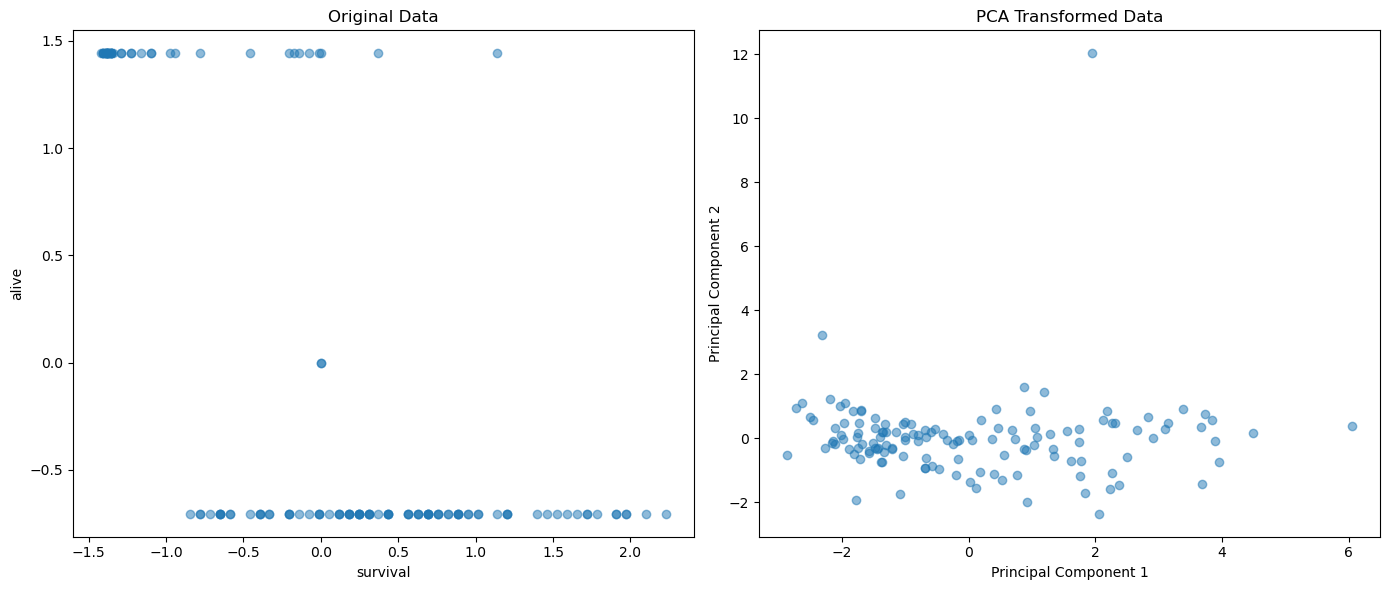

In [71]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the dataset
data = pd.read_csv('echocardiogram.csv')

# Handle missing values (if any)
data.fillna(data.mean(numeric_only=True), inplace=True)

# Separate categorical and numeric columns
cat_features = [feature for feature in data.columns if data[feature].dtype == 'O']
numeric_features = [feature for feature in data.columns if data[feature].dtype != 'O']

# Convert categorical columns using pd.get_dummies
data = pd.get_dummies(data, columns=cat_features)

# Standardize the numeric columns
scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features].values)

# Apply PCA
pca = PCA(n_components=15)
data_pca = pca.fit_transform(data)

# Check the shape of the PCA data
print(data_pca.shape)
print(data_pca[:5])  # Print the first 5 rows of the PCA-transformed data

###########################


# Plot the original data (first two numeric features)
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(data[numeric_features[0]], data[numeric_features[1]], alpha=0.5)
plt.title('Original Data')
plt.xlabel(numeric_features[0])
plt.ylabel(numeric_features[1])

# Apply PCA
pca = PCA(n_components=15)  # Reducing to 2 components for visualization
data_pca = pca.fit_transform(data)

# Plot the PCA transformed data
plt.subplot(1, 2, 2)
plt.scatter(data_pca[:, 0], data_pca[:, 1], alpha=0.5)
plt.title('PCA Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()


In [64]:
type(data_pca)

numpy.ndarray

In [65]:
data_pca.ndim

2

In [66]:
data_pca.shape

(133, 15)

# 7: Handling Imbalanced Data
    
- Resampling Techniques
- Oversampling

In [82]:
data = pd.read_csv('echocardiogram.csv')

data.alive.value_counts(True)

alive
0.0    0.671756
1.0    0.328244
Name: proportion, dtype: float64

In [96]:
data.shape

(133, 15)

In [100]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('echocardiogram.csv')

# Handle missing values (if any)
data.fillna(data.mean(numeric_only=True), inplace=True)

# Separate categorical and numeric columns
cat_features = [feature for feature in data.columns if data[feature].dtype == 'O']
numeric_features = [feature for feature in data.columns if data[feature].dtype != 'O']

# Convert categorical columns using pd.get_dummies
data = pd.get_dummies(data, columns=cat_features)

# Standardize the numeric columns
scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features].values)

# Convert the target variable to categorical if necessary
# Assuming 'alive' is the target column, you may need to binarize or discretize it
if data['alive'].dtype != 'int64' and data['alive'].dtype != 'bool':
    # Example: Binarize 'alive' if it's not already binary
    # Replace this logic with appropriate binning or thresholding based on your dataset
    data['alive'] = (data['alive'] > 0.5).astype(int)

# Separate features and target
X = data.drop(columns=['alive'])  # Replace 'alive' with your target column
y = data['alive']  # Replace 'alive' with your target column

# Encode the target variable if it's not already encoded
if y.dtype == 'O':
    le = LabelEncoder()
    y = le.fit_transform(y)

print(X.shape, y.shape)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine resampled data
data_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['alive'])], axis=1)
data_resampled.head()

(133, 14) (133,)


,survival,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotion-score,wallmotion-index,mult,aliveat1,name_name,group_1,group_2,group_name,alive
0,-0.716029,1.012235,-0.115118,0.418467,-0.459793,-0.212055,-0.089339,-0.849432,0.965761,-0.917516,True,True,False,False,0
1,-0.203799,1.135885,-0.115118,1.579098,-0.895647,-0.861905,-0.089339,0.723590,-0.895308,-0.917516,True,True,False,False,0
2,-0.395885,-0.966169,-0.115118,0.418467,-1.186216,-1.745702,-0.089339,-0.849432,0.965761,-0.917516,True,True,False,False,0
3,2.229295,-0.347917,-0.115118,0.350763,-0.014931,-0.208156,0.318486,0.161797,0.008124,-0.917516,True,True,False,False,0
4,-0.203799,-0.718868,-0.115118,-0.548726,1.428909,1.282600,0.726312,1.959536,-0.972099,-0.917516,True,True,False,False,1


In [92]:
data_resampled.alive.value_counts(True)

alive
0    0.5
1    0.5
Name: proportion, dtype: float64

In [93]:
data_resampled.shape

(180, 15)

Undersampling
-

In [83]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('echocardiogram.csv')

# Handle missing values (if any)
data.fillna(data.mean(numeric_only=True), inplace=True)

# Separate categorical and numeric columns
cat_features = [feature for feature in data.columns if data[feature].dtype == 'O']
numeric_features = [feature for feature in data.columns if data[feature].dtype != 'O']

# Convert categorical columns using pd.get_dummies
data = pd.get_dummies(data, columns=cat_features)

# Standardize the numeric columns
scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features].values)

# Convert the target variable to categorical if necessary
# Assuming 'alive' is the target column, you may need to binarize or discretize it
if data['alive'].dtype != 'int64' and data['alive'].dtype != 'bool':
    # Example: Binarize 'alive' if it's not already binary
    # Replace this logic with appropriate binning or thresholding based on your dataset
    data['alive'] = (data['alive'] > 0.5).astype(int)

# Separate features and target
X = data.drop(columns=['alive'])  # Replace 'alive' with your target column
y = data['alive']  # Replace 'alive' with your target column

# Encode the target variable if it's not already encoded
if y.dtype == 'O':
    le = LabelEncoder()
    y = le.fit_transform(y)

print(X.shape, y.shape)

# Apply SMOTE Undersampling
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_resampled, y_resampled = rus.fit_resample(X, y)

# Combine resampled data
data_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['alive'])], axis=1)
data_resampled.head()


(133, 14) (133,)


,survival,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotion-score,wallmotion-index,mult,aliveat1,name_name,group_1,group_2,group_name,alive
120,0.372460,8.785877e-16,-0.115118,0.128309,1.007583,0.944678,-0.497165,-0.399997,-0.344214,0.000000,True,False,False,False,0
80,0.628575,2.303329e-02,-0.115118,-0.161849,-1.040931,0.567765,-1.312815,-0.849432,-0.976616,0.000000,True,False,True,False,0
92,0.820662,1.466835e-01,-0.115118,0.805344,-0.808476,-0.523983,-0.089339,-0.242695,-0.000910,0.000000,True,False,True,False,0
116,0.756633,-1.006169e-01,0.035333,-0.258568,2.431373,2.426336,1.032181,1.285383,-0.326146,0.000000,True,False,False,False,0
2,-0.395885,-9.661685e-01,-0.115118,0.418467,-1.186216,-1.745702,-0.089339,-0.849432,0.965761,-0.917516,True,True,False,False,0


In [85]:
data_resampled.alive.value_counts()

alive
0    43
1    43
Name: count, dtype: int64

In [86]:
data_resampled.shape

(86, 15)

# 8: Splitting Data

In [101]:
from sklearn.model_selection import train_test_split
data = pd.read_csv('echocardiogram.csv')

X = data.drop('alive', axis=1)
y = data['alive']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [102]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((106, 12), (27, 12), (106,), (27,))